### Embedding image elements. Instead of URLs content (images) is downloaded and inserted as base64. Made for Illustrator, Photoshop and so on to be autonomous without internet connection

In [13]:
import base64
import requests
import re
from bs4 import BeautifulSoup

with open(r"Memory bandwidth comparison.svg", 'r') as f_in:
    soup = BeautifulSoup(f_in, 'xml')
    
image_tags = soup.select(r'image')
for img in image_tags:
    if re.findall(r'^https?:', img['xlink:href'], re.IGNORECASE):
        r = requests.get(img['xlink:href'])
        ext = img['xlink:href'].split('.')[-1]
        img['xlink:href'] = rf'data:image/{ext};base64,' + base64.b64encode(r.content).decode('ascii')

with open('output.svg', 'w') as f_out:
    fixed_xml = (str(soup.prettify())).replace('xmlns:=', 'xmlns=')
    f_out.write(fixed_xml)

In [183]:
soup.findAll("image", attrs={'x':424.5})
#xlink:href="data:image/png;base64,IMAGE_DATA"

[<image height="65" preserveAspectRatio="none" width="65" x="424.5" xlink:href="https://cdn4.iconfinder.com/data/icons/Primo_Icons/PNG/128x128/chip.png" y="197.5"/>,
 <image height="65" preserveAspectRatio="none" width="65" x="424.5" xlink:href="https://cdn4.iconfinder.com/data/icons/Primo_Icons/PNG/128x128/chip.png" y="137.5"/>,
 <image height="65" preserveAspectRatio="none" width="65" x="424.5" xlink:href="https://cdn4.iconfinder.com/data/icons/Primo_Icons/PNG/128x128/chip.png" y="78.5"/>,
 <image height="65" preserveAspectRatio="none" width="65" x="424.5" xlink:href="https://cdn4.iconfinder.com/data/icons/Primo_Icons/PNG/128x128/chip.png" y="394.5"/>,
 <image height="65" preserveAspectRatio="none" width="65" x="424.5" xlink:href="https://cdn4.iconfinder.com/data/icons/Primo_Icons/PNG/128x128/chip.png" y="334.5"/>,
 <image height="65" preserveAspectRatio="none" width="65" x="424.5" xlink:href="https://cdn4.iconfinder.com/data/icons/Primo_Icons/PNG/128x128/chip.png" y="275.5"/>]

In [186]:
ns = {'xmlns': "http://www.w3.org/2000/svg", 'xlink': "http://www.w3.org/1999/xlink"}

In [447]:
'data=' + base64.b64encode(r.content).decode('ascii')

'data=iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAYAAADDPmHLAAAQcElEQVR42u1d228TVxr/ZsaXOLZzg1wgQEKBSlRQjFbdbi/bZqWirrYPZf+DRsKhL634D+p9276hwkoEI4U+tfsWKsFuVe0u28tK3WpVUKGVCCQQYpybHTt2fBnPZfWdufgS353YOc75pNFkPDMwc87vfLfzO99YgMmuFgtrAgYAJgwATBgAmDAAMGEAYMIAwIQBgAkDABMGACYMAEwYAJgwADBhAGiZvP37P5wCgOs8z3nwmOM48jsHXP6FBYf79u2Dd955BywW7RUFQSB7nueL/j+qqubtZVkme0mS4ObNmxAMBgtuyNvhjfqxtlcU9Q4AXPjy77f+zQBQp5w58zZ2/h3szJde+lVBx5cHwL2ffoJEImECwOj40gAw9oregYoJAATFmbfeApvdvgkAhT8YAPjhh/95gsHg7TNn3vZ89dWXdxkA6hCO533YgRaLAIJgye/nUprA7A4O1tbWoLu7W3tRq64JVAFyNYkhRofndjxKJBKBY0ePwYEDByEcDhf5f9SiGgCfGZ89o6o+APgjA0A9oipncUQ+e/aMqGEygo2OMwDAcSVvd7lccOTIc3qH5JsC475C1V8IgPn5p+DxnIKZhw/g++//W9J0GABQCkwIvgMzAfWrAOB5ocCGC/mXlAFAILAA/f17QbBYwFoCAIUdKRm2P5MBSZLB4eiArq4umJ2dM7VQUQAYot9v/szJzAmsXwOom0aosedKmeIcSaXS8Gh2FoaHh00A8BUAIOcAYGVlFV595TfEAQyFwlDOedjkDBZoBgaAujRAjtfP8RVHfDFZWV4hYOnt7S2rARQlHwCRyBo8//zzxIz845//KvOMXB4gOd3J5HRTAhwwANSvAEprgFpkaWmZaAN3lxsEvrIGiMVi8OLJk3Ds6FH4+ptvIRQK1fTMjT4vA0AVDVyroFMXWAiAw+EgEQHP5YeDiq

#### Bug with BeautifulSoup parser.  https://bugs.launchpad.net/beautifulsoup/+bug/1840141 
#### So finally just use above
`(str(soup)).replace('xmlns:=', 'xmlns=')`

In [470]:
with open(r"Memory bandwidth comparison.svg", 'r') as f_in:
    soup = BeautifulSoup(f_in, 'xml')
    with open('output_delete.svg', 'w') as f_out:
        f_out.write(str(soup.prettify()))

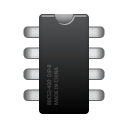

In [9]:
from IPython.display import Image 
pil_img = Image(r.content)
display(pil_img)

In [429]:
image_urls

['https://cdn4.iconfinder.com/data/icons/Primo_Icons/PNG/128x128/chip.png',
 'https://cdn2.iconfinder.com/data/icons/free-mobile-icon-kit/64/Chip.png',
 'https://cdn4.iconfinder.com/data/icons/Primo_Icons/PNG/128x128/chip.png',
 'https://cdn4.iconfinder.com/data/icons/Primo_Icons/PNG/128x128/chip.png',
 'https://cdn4.iconfinder.com/data/icons/Primo_Icons/PNG/128x128/chip.png',
 'https://cdn2.iconfinder.com/data/icons/free-mobile-icon-kit/64/Chip.png',
 'https://cdn4.iconfinder.com/data/icons/Primo_Icons/PNG/128x128/chip.png',
 'https://cdn4.iconfinder.com/data/icons/Primo_Icons/PNG/128x128/chip.png',
 'https://cdn4.iconfinder.com/data/icons/Primo_Icons/PNG/128x128/chip.png',
 'https://cdn2.iconfinder.com/data/icons/free-mobile-icon-kit/64/Chip.png',
 'https://cdn4.iconfinder.com/data/icons/Primo_Icons/PNG/128x128/chip.png',
 'https://cdn4.iconfinder.com/data/icons/Primo_Icons/PNG/128x128/chip.png',
 'https://cdn4.iconfinder.com/data/icons/Primo_Icons/PNG/128x128/chip.png',
 'https://cd

Load and show all images

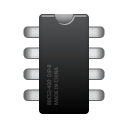

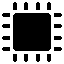

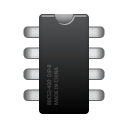

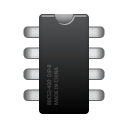

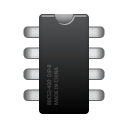

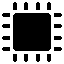

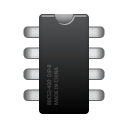

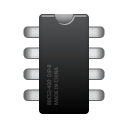

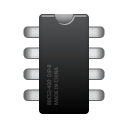

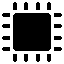

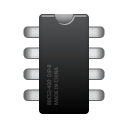

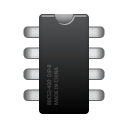

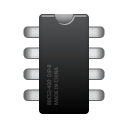

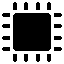

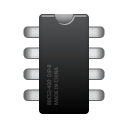

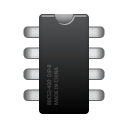

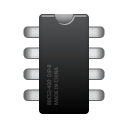

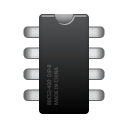

In [423]:
from IPython.display import Image 

image_urls = [im['xlink:href'] for im in soup.select(r'image')]
for url in image_urls:
    r = requests.get(url)
    pil_img = Image(r.content)
    display(pil_img)

Didn't succeed with Soup Sieve to get images with such namespaces "xlink:href"

In [12]:
ns = {'xmlns': "http://www.w3.org/2000/svg", 'xlink': "http://www.w3.org/1999/xlink"}
soup.select(r'image["xlink:href"]', namespaces=ns)

SelectorSyntaxError: Malformed attribute selector at position 5
  line 1:
image["xlink:href"]
     ^ (<string>)

In [138]:
a['xlink:href'].startswith('http')

True

#### Another approach instead of BeautifulSoup

In [83]:
import xml.etree.ElementTree as ET
tree = ET.parse(r"C:\Users\Evgeny\Documents\FPGA\Memory bandwidth comparison.svg")
root = tree.getroot()
ns = {'xmlns': "http://www.w3.org/2000/svg", 'xlink': "http://www.w3.org/1999/xlink"}
    
    
    #child.attrib

In [86]:
print(root.findall('xlink:image', ns))

[]


In [72]:
root = tree.getroot()

In [79]:
a = root.find('image')

In [82]:
print(a)

None
